<a href="https://colab.research.google.com/github/Kenshiyagami/Projeto/blob/master/Trabalhogrupopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importado Biblioteca



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


1.LEITURA DE DADOS COM PANDAS

*   Item da lista
*   Item da lista



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#caminho no 
PATH="/content/drive/MyDrive/uninove pos-graduação IA/python/Proposta de Avaliação da Disciplina/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pd.read_csv(PATH+'netflix_titles.csv')

In [ ]:
netflix_titles=pd.read_csv(PATH+'netflix_titles.csv')

1.MANIPULAÇAO E LIMPEZA DE DADOS 

*   Item da lista
*   Item da lista



In [ ]:
netflix_titles.drop(['show_id','cast','description'], axis=1, inplace=True)

In [ ]:
netflix_titles['date_added'] = pd.to_datetime(netflix_titles.date_added)
netflix_titles["adicionado_mes"] = pd.to_datetime(netflix_titles.date_added, format="%d/%m/%Y").dt.month
netflix_titles["adicionado_ano"] = pd.to_datetime(netflix_titles.date_added, format="%d/%m/%Y").dt.year


In [ ]:
netflix_titles.drop('date_added', axis=1, inplace=True)

Separdo os tempo das séries do tempo dos filmes

In [ ]:
netflix_titles['movie_duração_min'] = netflix_titles[netflix_titles['type'] == 'Movie']['duration'].apply(lambda x: str(x).split(' ')[0])
netflix_titles['TVShow_Temporadas'] = netflix_titles[netflix_titles['type'] == 'TV Show']['duration'].apply(lambda x: str(x).split(' ')[0])

In [ ]:
netflix_titles.drop('duration', axis=1, inplace=True)

In [ ]:
netflix_titles['quantis_do_ano'] = pd.cut(netflix_titles['adicionado_mes'], [0,4,7,10,netflix_titles['adicionado_mes'].max()], labels=['1','2','3','4'], right=False)
netflix_titles['adicionado_mes'].replace(
    {1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'},
     inplace=True)
netflix_titles['movie_duração_min'].replace({np.NaN : 0}, inplace=True)
netflix_titles['movie_duração_min'] = netflix_titles['movie_duração_min'].astype("float")
netflix_titles['movie_duração_min'] = pd.cut(netflix_titles['movie_duração_min'], [0,1,61,91,121, netflix_titles['movie_duração_min'].max()], 
                                  labels=['TV-SHOW', '1-60', '61-90', '91-120', '121-' + str(netflix_titles['movie_duração_min'].max())],
                                  right=False)
netflix_titles['TVShow_Temporadas'].fillna('Movie', inplace=True)

netflix_titles['adicionado_ano'].fillna(netflix_titles['release_year'], inplace=True)
netflix_titles['adicionado_ano'] = netflix_titles['adicionado_ano'].astype('int64')
netflix_titles['adicionado_mes'] = netflix_titles['adicionado_mes'].fillna(netflix_titles['adicionado_mes'].mode()[0])
netflix_titles['quantis_do_ano'] = netflix_titles['quantis_do_ano'].fillna(netflix_titles['quantis_do_ano'].mode()[0])


In [ ]:
# encontrei essa função e gostei dela...

def Verifica_informacao(dataframe, head=5):

    pd.set_option('display.max_columns', None)   #*
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', 170)

    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Info #####################")  #*
    print(dataframe.info())

    print("##################### Columns #####################")  #*
    print(dataframe.columns)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### Nunique #####################")
    print(netflix_titles.nunique())

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Describe #####################")
    print(dataframe.describe().T)
    
Verifica_informacao(netflix_titles)

##################### Shape #####################
(8807, 12)
##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               8807 non-null   object  
 1   title              8807 non-null   object  
 2   director           6173 non-null   object  
 3   country            7976 non-null   object  
 4   release_year       8807 non-null   int64   
 5   rating             8803 non-null   object  
 6   listed_in          8807 non-null   object  
 7   adicionado_mes     8807 non-null   object  
 8   adicionado_ano     8807 non-null   int64   
 9   movie_duração_min  8803 non-null   category
 10  TVShow_Temporadas  8807 non-null   object  
 11  quantis_do_ano     8807 non-null   category
dtypes: category(2), int64(2), object(8)
memory usage: 705.8+ KB
None
##################### Colum

In [ ]:
def filtro_ano_lancamento(df,ano):
 return df[df['release_year'] == ano]
filtro_ano_lancamento(netflix_titles,1925)

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
4250,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,1925,TV-14,TV Shows,Dec,2018,TV-SHOW,1,3


In [ ]:
netflix_titles.groupby("adicionado_mes").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
adicionado_mes,,,,,,,,,,,
Apr,764,764,549,694,764,764,764,764,763,764,764
Aug,755,755,530,667,755,755,755,755,754,755,755
Dec,813,813,549,759,813,812,813,813,812,813,813
Feb,563,563,385,541,563,562,563,563,563,563,563
Jan,738,738,537,701,738,737,738,738,738,738,738
Jul,837,837,577,717,837,837,837,837,837,837,837
Jun,728,728,495,633,728,728,728,728,728,728,728
Mar,742,742,542,686,742,741,742,742,742,742,742
May,632,632,446,545,632,632,632,632,632,632,632


In [ ]:
netflix_titles.groupby("type").count()

,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
type,,,,,,,,,,,
Movie,6131,5943,5691,6131,6129,6131,6131,6131,6127,6131,6131
TV Show,2676,230,2285,2676,2674,2676,2676,2676,2676,2676,2676


In [ ]:
netflix_titles.groupby("quantis_do_ano").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas
quantis_do_ano,,,,,,,,,,,
1,2043,2043,1464,1928,2043,2040,2043,2043,2043,2043,2043
2,2124,2124,1490,1872,2124,2124,2124,2124,2124,2123,2124
3,3175,3175,2176,2804,3175,3174,3175,3175,3175,3172,3175
4,1465,1465,1043,1372,1465,1465,1465,1465,1465,1465,1465


In [ ]:
netflix_titles.groupby("movie_duração_min").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,TVShow_Temporadas,quantis_do_ano
movie_duração_min,,,,,,,,,,,
TV-SHOW,2676,2676,230,2285,2676,2674,2676,2676,2676,2676,2676
1-60,487,487,397,393,487,486,487,487,487,487,487
61-90,1503,1503,1451,1363,1503,1503,1503,1503,1503,1503,1503
91-120,2996,2996,2958,2857,2996,2995,2996,2996,2996,2996,2996
121-312.0,1141,1141,1134,1074,1141,1141,1141,1141,1141,1141,1141


In [ ]:
netflix_titles.groupby("TVShow_Temporadas").count()

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,quantis_do_ano
TVShow_Temporadas,,,,,,,,,,,
1,1793,1793,184,1458,1793,1791,1793,1793,1793,1793,1793
10,7,7,0,7,7,7,7,7,7,7,7
11,2,2,0,2,2,2,2,2,2,2,2
12,2,2,0,2,2,2,2,2,2,2,2
13,3,3,0,3,3,3,3,3,3,3,3
15,2,2,1,2,2,2,2,2,2,2,2
17,1,1,0,1,1,1,1,1,1,1,1
2,425,425,21,386,425,425,425,425,425,425,425
3,199,199,4,188,199,199,199,199,199,199,199


In [ ]:
netflix_titles.head(10)

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,Documentaries,Sep,2021,61-90,Movie,3
1,TV Show,Blood & Water,NaN,South Africa,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",Sep,2021,TV-SHOW,2,3
2,TV Show,Ganglands,Julien Leclercq,NaN,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",Sep,2021,TV-SHOW,1,3
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,"Docuseries, Reality TV",Sep,2021,TV-SHOW,1,3
4,TV Show,Kota Factory,NaN,India,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",Sep,2021,TV-SHOW,2,3
5,TV Show,Midnight Mass,Mike Flanagan,NaN,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",Sep,2021,TV-SHOW,1,3
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",NaN,2021,PG,Children & Family Movies,Sep,2021,91-120,Movie,3
7,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,"Dramas, Independent Movies, International Movies",Sep,2021,121-312.0,Movie,3
8,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,"British TV Shows, Reality TV",Sep,2021,TV-SHOW,9,3
9,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,"Comedies, Dramas",Sep,2021,91-120,Movie,3


In [ ]:
netflix_titles.tail(10)

,type,title,director,country,release_year,rating,listed_in,adicionado_mes,adicionado_ano,movie_duração_min,TVShow_Temporadas,quantis_do_ano
8797,TV Show,Zak Storm,NaN,"United States, France, South Korea, Indonesia",2016,TV-Y7,Kids' TV,Sep,2018,TV-SHOW,3,3
8798,Movie,Zed Plus,Chandra Prakash Dwivedi,India,2014,TV-MA,"Comedies, Dramas, International Movies",Dec,2019,121-312.0,Movie,3
8799,Movie,Zenda,Avadhoot Gupte,India,2009,TV-14,"Dramas, International Movies",Feb,2018,91-120,Movie,1
8800,TV Show,Zindagi Gulzar Hai,NaN,Pakistan,2012,TV-PG,"International TV Shows, Romantic TV Shows, TV ...",Dec,2016,TV-SHOW,1,3
8801,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,"Dramas, International Movies, Thrillers",Mar,2016,91-120,Movie,1
8802,Movie,Zodiac,David Fincher,United States,2007,R,"Cult Movies, Dramas, Thrillers",Nov,2019,121-312.0,Movie,4
8803,TV Show,Zombie Dumb,NaN,NaN,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",Jul,2019,TV-SHOW,2,3
8804,Movie,Zombieland,Ruben Fleischer,United States,2009,R,"Comedies, Horror Movies",Nov,2019,61-90,Movie,4
8805,Movie,Zoom,Peter Hewitt,United States,2006,PG,"Children & Family Movies, Comedies",Jan,2020,61-90,Movie,1
8806,Movie,Zubaan,Mozez Singh,India,2015,TV-14,"Dramas, International Movies, Music & Musicals",Mar,2019,91-120,Movie,1


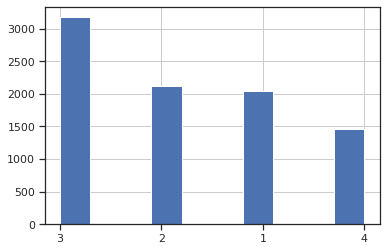

In [ ]:
netflix_titles['quantis_do_ano'].hist()

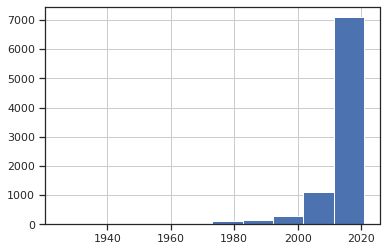

In [ ]:
netflix_titles['release_year'].hist()

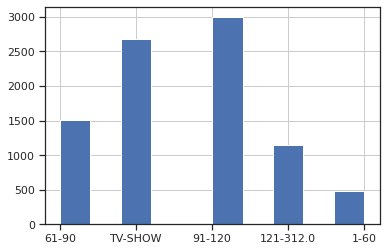

In [ ]:
netflix_titles['movie_duração_min'].hist()

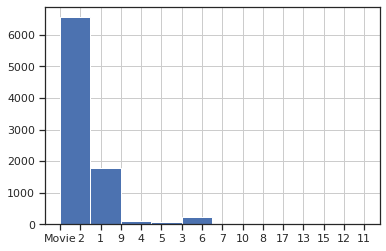

In [ ]:
netflix_titles['TVShow_Temporadas'].hist()

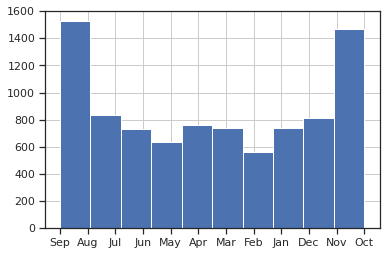

In [ ]:
netflix_titles['adicionado_mes'].hist()

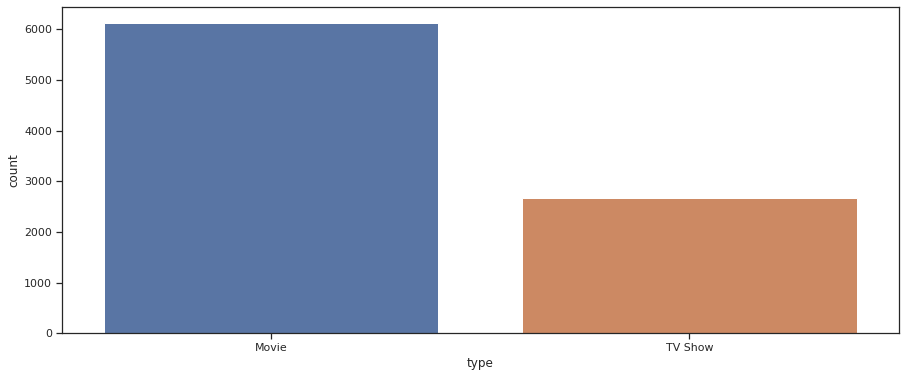

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data = netflix_titles ,x ='type')

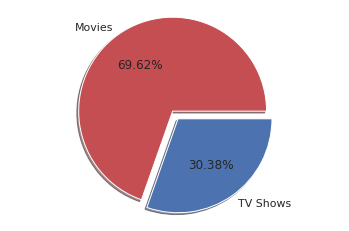

In [ ]:
label = 'Movies','TV Shows'
color = ['r','b']
explode = (0.1,0)
sizes = netflix_titles.type.value_counts()
plt.pie(sizes,explode = explode, colors= color, labels =label,shadow = True,autopct ='%1.2f%%')
plt.axis('equal');

Text(0.5, 1.0, 'Frequencia de Avaliação')

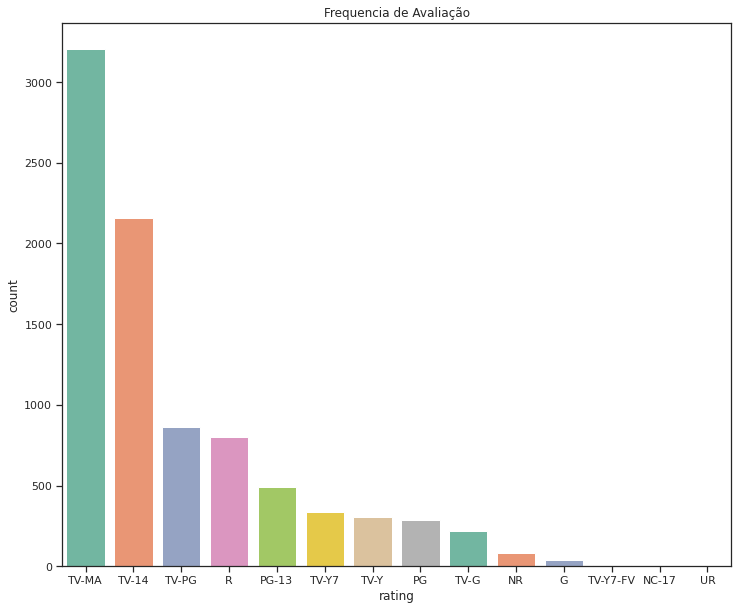

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="ticks")
ax = sns.countplot(x="rating", data=netflix_titles, palette="Set2", order=netflix_titles['rating'].value_counts().index[0:14])
plt.title('Frequencia de Avaliação')

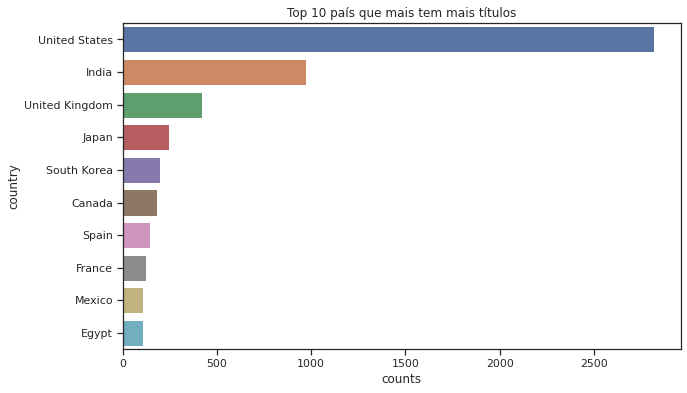

In [ ]:
plt.figure(figsize=(10,6))
top_countries = netflix_titles['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:10]
sns.barplot(data = top_countries, x= 'counts',y = 'country')
plt.title('Top 10 país que mais tem mais títulos');

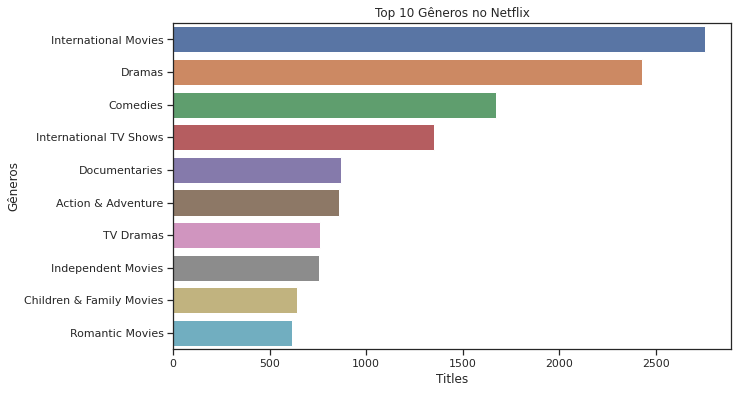

In [ ]:
filtered_genres = netflix_titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Gêneros no Netflix')
plt.xlabel('Titles')
plt.ylabel('Gêneros')
plt.show()

# Nova seção

In [ ]:
@misc {storopolisouza2020cienciadedados,
  author = {Storopoli, Jose and Souza, Edson Melo de},
  title = {Ciência de Dados com Python: pandas, matplotlib, Scikit-Learn, TensorFlow e PyTorch},
  url = {https://github.com/storopoli/ciencia-de-dado},
  year = {2020}
}